<a href="https://colab.research.google.com/github/kleenman/tds_capstone/blob/emma/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install geopandas
!conda install geopandas


/bin/bash: line 1: conda: command not found


In [ ]:
import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import geopandas as gpd



In [ ]:
import requests
import json
import os

# Base URL for the files
base_url = 'https://www.opengeodata.nrw.de/produkte/geobasis/lusat/idop/idop_jp2_f2/'

# JSON string with the data
data = {
  "datasets": [
    {
      "files": [
        {"name":"idop20rgbi_32_288_5736_1_nw_2023.jp2", "size":"51056779", "timestamp":"2023-07-05T18:01:13"},
        {"name":"idop20rgbi_32_288_5737_1_nw_2023.jp2", "size":"49413971", "timestamp":"2023-07-05T18:02:22"},
        {"name":"idop20rgbi_32_288_5744_1_nw_2023.jp2", "size":"49529857", "timestamp":"2023-07-05T18:03:31"},
        {"name":"idop20rgbi_32_288_5745_1_nw_2023.jp2", "size":"52052845", "timestamp":"2023-07-05T18:04:41"},
        {"name":"idop20rgbi_32_288_5746_1_nw_2023.jp2", "size":"52558074", "timestamp":"2023-07-05T18:05:51"},
        {"name":"idop20rgbi_32_288_5747_1_nw_2023.jp2", "size":"47473976", "timestamp":"2023-07-05T18:07:00"},
        {"name":"idop20rgbi_32_289_5736_1_nw_2023.jp2", "size":"50599778", "timestamp":"2023-07-05T18:08:09"},
        {"name":"idop20rgbi_32_289_5737_1_nw_2023.jp2", "size":"51174512", "timestamp":"2023-07-05T18:09:18"},
        {"name":"idop20rgbi_32_289_5744_1_nw_2023.jp2", "size":"48853960", "timestamp":"2023-07-05T18:10:27"},
        {"name":"idop20rgbi_32_289_5745_1_nw_2023.jp2", "size":"50053184", "timestamp":"2023-07-05T18:11:36"},
        {"name":"idop20rgbi_32_289_5746_1_nw_2023.jp2", "size":"47205241", "timestamp":"2023-07-05T18:12:44"},
        {"name":"idop20rgbi_32_289_5747_1_nw_2023.jp2", "size":"46514071", "timestamp":"2023-07-05T18:13:53"}
      ]
    }
  ]
}

download_directory = 'downloaded_images'
os.makedirs(download_directory, exist_ok=True)

# Iterate over the datasets and files to download them
for dataset in data['datasets']:
    for file in dataset['files']:
        # Construct the full URL
        file_url = base_url + file['name']

        # Path for the local file
        local_file_path = os.path.join(download_directory, file['name'])

        # Stream the file content and write it to the local file
        with requests.get(file_url, stream=True) as r:
            r.raise_for_status()
            with open(local_file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

        print(f"Downloaded {file['name']}")

print('All files have been downloaded.')




Downloaded idop20rgbi_32_288_5736_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5737_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5744_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5745_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5746_1_nw_2023.jp2
Downloaded idop20rgbi_32_288_5747_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5736_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5737_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5744_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5745_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5746_1_nw_2023.jp2
Downloaded idop20rgbi_32_289_5747_1_nw_2023.jp2
All files have been downloaded.


In [ ]:
from PIL import Image

def rescale_image(filename, target_width=1000, target_height=1000):
    try:
        # Open the downloaded image using Pillow
        img = Image.open(filename)

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print(f"Image {filename} resized successfully!")
        return False
    except Exception as e:
        print(f"Error while resizing image {filename}: {e}")
        return True


In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image

def rescale_image(filename, target_width=1000, target_height=1000):
    try:
        # Open the downloaded image using Pillow
        img = Image.open(filename)

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print(f"Image {filename} resized successfully!")
        return False
    except Exception as e:
        print(f"Error while resizing image {filename}: {e}")
        return True


In [ ]:
# Assuming 'data' is your dictionary from the JSON code
for dataset in data['datasets']:
    for file in dataset['files']:
        # The path to the downloaded image file
        local_file_path = os.path.join('downloaded_images', file['name'])

        # Call the rescale function
        error_occurred = rescale_image(local_file_path)
        if error_occurred:
            print(f"Failed to process {file['name']}")


Image downloaded_images/idop20rgbi_32_288_5736_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5737_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5744_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5745_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5746_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_288_5747_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5736_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5737_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5744_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5745_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5746_1_nw_2023.jp2 resized successfully!
Image downloaded_images/idop20rgbi_32_289_5747_1_nw_2023.jp2 resized successfully!


In [ ]:
!pip install Pillow exifread


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
download_directory = '/content/drive/My Drive/downloaded_images'
os.makedirs(download_directory, exist_ok=True)
local_file_path = os.path.join(download_directory, file['name'])

# Stream the file content and write it to the local file
with requests.get(file_url, stream=True) as r:
    r.raise_for_status()
    with open(local_file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)


In [ ]:
!pip install exifread


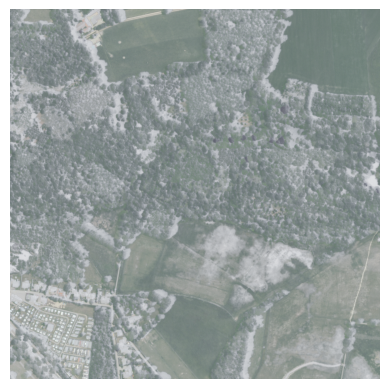

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open a JP2 image
image_path = '/content/downloaded_images/idop20rgbi_32_288_5736_1_nw_2023.jp2'
  # Replace with your image path
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
from pyproj import Transformer

# Transformer to convert from EPSG:25832 to EPSG:4326
transformer = Transformer.from_crs("EPSG:25832", "EPSG:4326")

# Example of transforming a single coordinate pair
easting, northing = 288000, 5736000
latitude, longitude = transformer.transform(northing, easting) # Note the order: (y, x) or (northing, easting)
print(f"Latitude: {latitude}, Longitude: {longitude}")


Latitude: 1.9158496084896521, Longitude: 51.511961285502224


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
import geopandas as gpd

# Load the GeoJSON file
gdf = gpd.read_file('https://raw.githubusercontent.com/kleenman/tds_capstone/main/bayernatlas_munich.geojson')

# Print the GeoDataFrame
gdf


,name,description,styleUrl,srid,geometry
0,München,<table>\n<tr><td>Gebiet:</td><td>München</td><...,"https://atlas.bayern.de/?c=677751,5422939&z=7&...",3857,"MULTIPOLYGON Z (((11.38870 48.19740 0.00000, 1..."


In [ ]:
import pandas as pd
from PIL import Image
import re # for regex functions

In [ ]:
munich_image_urls = pd.read_csv("https://raw.githubusercontent.com/kleenman/tds_capstone/main/munich.csv",header=None)
munich_image_urls.head()

,0
0,https://download1.bayernwolke.de/a/dop40/data/...
1,https://download1.bayernwolke.de/a/dop40/data/...
2,https://download1.bayernwolke.de/a/dop40/data/...
3,https://download1.bayernwolke.de/a/dop40/data/...
4,https://download1.bayernwolke.de/a/dop40/data/...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pillow
import requests
from io import BytesIO
def download_and_rescale_image(url,filename, target_width=1000, target_height=1000):
    try:

        response = requests.get(url)
        response.raise_for_status()

        # Open the downloaded image using Pillow
        img = Image.open(BytesIO(response.content))

        # Resize the image to the target dimensions while preserving the aspect ratio
        img.thumbnail((target_width, target_height))

        # Save the resized image
        img.save(filename)
        print("Image downloaded and resized successfully!")
        return False
    except Exception as e:
        print("Error",e)
        return True



# Read the CSV file to get the image URLs
munich_image_urls_df = pd.read_csv("https://raw.githubusercontent.com/kleenman/tds_capstone/main/munich.csv", header=None)
munich_image_urls = munich_image_urls_df[0].tolist()
# Folder path in Google Drive where you want to save the images
save_folder_path = '/content/drive/My Drive/downloaded_images/'

# Loop through the image URLs and download/rescale each image
for i, url in enumerate(munich_image_urls):
    filename = url.split('/')[-1]  # This gets the last part of the URL (e.g., '32700_5330.tif')
    filename_without_extension = filename.split('.')[0]  # Removes the file extension (e.g., '32700_5330')
    full_save_path = f"{save_folder_path}/{filename_without_extension}_resized.jpg"

    # Download and resize the image
    download_and_rescale_image(url, full_save_path)

Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downloaded and resized successfully!
Image downl

In [ ]:
!pip install osmnx

import osmnx as ox
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from pyproj import Transformer
import os

def create_masks(name):
    base_dir = "/content/drive/My Drive/downloaded_images"
    masks_dir = os.path.join(base_dir, "masks_numpy")
    os.makedirs(masks_dir, exist_ok=True)

    transformer = Transformer.from_crs("EPSG:28352", "EPSG:4326")

    for file in os.listdir(base_dir):
        if os.path.isdir(os.path.join(base_dir, file)):
            continue

        parts = file.split("_")
        X, Y = parts[0], parts[1]
        X = (int(X[2:]) if X.startswith("32") else int(X)) * 1000
        Y = int(Y) * 1000

        mask_filename = os.path.join(masks_dir, f"{X//1000}-{Y//1000}.npy")
        if os.path.exists(mask_filename):
            continue

        try:
            south, west = transformer.transform(Y, X)
            north, east = transformer.transform(Y + 1000, X + 1000)
            geo_information = ox.features_from_bbox(north, south, east, west, tags={'leisure': 'park'})

            if not geo_information.empty:
                raster = np.zeros((1000,1000))
                for feature in geo_information.itertuples():
                    for x_west in range(1000):
                        for y_north in range(1000):
                            x_coord = X+x_west
                            y_coord = Y+(1000-y_north)
                            point = transformer.transform(y_coord, x_coord)
                            if Polygon(feature.geometry).contains(point):
                                raster[999-y_north, x_west] = 1
                np.save(mask_filename, raster)
            else:
                np.save(mask_filename, np.zeros((1000, 1000)))
        except Exception as e:
            print(f"An error occurred for file {file}: {e}")
            np.save(mask_filename, np.zeros((1000, 1000)))

create_masks("munich")



An error occurred for file 32695_5339_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32695_5341_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32697_5329_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32693_5328_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32686_5328_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32687_5328_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32695_5337_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurred for file 32691_5329_resized.jpg: No data elements in server response. Check log and query location/tags.
An error occurre

KeyboardInterrupt: 

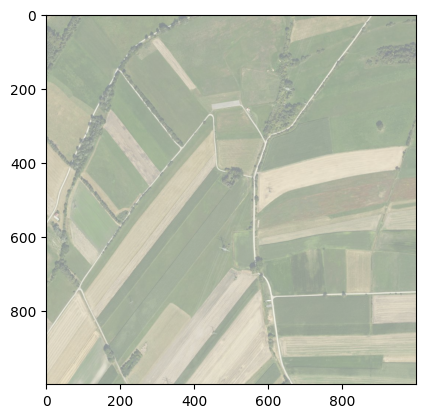

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image = np.array(Image.open("/content/drive/My Drive/downloaded_images/32675_5336_resized.jpg"))
mask = np.load("/content/drive/My Drive/downloaded_images/masks_numpy/675-5336.npy")
plt.imshow(image)
plt.imshow(mask, cmap='Greens', alpha=0.5)  # Change color map to 'Greens'
plt.show()


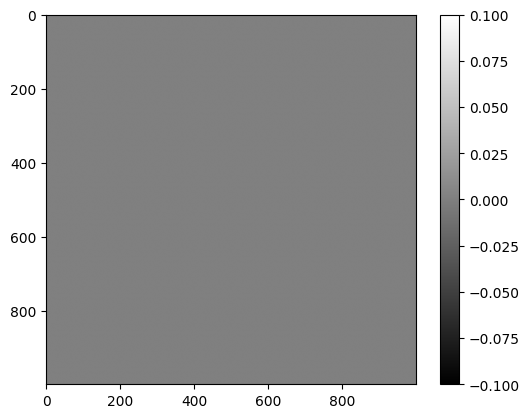

[0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the mask
mask = np.load("/content/drive/My Drive/downloaded_images/masks_numpy/676-5338.npy")

# Display the mask
plt.imshow(mask, cmap='gray')  # Using 'gray' colormap to see the mask clearly
plt.colorbar()  # To show the scale of values in the mask
plt.show()
print(np.unique(mask))

In [ ]:
!pip install overpy


In [ ]:
import requests
import csv
from io import StringIO
from pyproj import Proj, transform
import overpy

def extract_coordinates(url):
    parts = url.split('/')[-1].split('.')[0].split('_')

    # Assuming the format is something like "32649_5487"
    # Remove the initial '32' from the x part and then multiply by 1000
    x = (int(parts[0][2:]) if parts[0].startswith('32') else int(parts[0])) * 1000

    # Multiply y part by 1000
    y = int(parts[1]) * 1000

    return x, y

from pyproj import Transformer

def transform_coordinates(x, y):
    # Create a transformer object for converting from EPSG:25832 to EPSG:4326
    transformer = Transformer.from_crs("epsg:25832", "epsg:4326", always_xy=True)
    # Perform the transformation and return the result
    lon, lat = transformer.transform(x, y)
    return lat, lon


def query_osm_for_parks(lat, lon):
    api = overpy.Overpass()
    radius = 200  # Define a small radius for search
    query = f"""
    [out:json];
    (
      node["leisure"="park"](around:{radius},{lat},{lon});
      way["leisure"="park"](around:{radius},{lat},{lon});
      relation["leisure"="park"](around:{radius},{lat},{lon});
    );
    out center;
    """
    result = api.query(query)
    return len(result.nodes) > 0 or len(result.ways) > 0 or len(result.relations) > 0

# Fetching and reading the CSV file from a URL
url = 'https://raw.githubusercontent.com/kleenman/tds_capstone/main/wuerzburg.csv'
response = requests.get(url)
response_text = response.text
csv_file = StringIO(response_text)
csv_reader = csv.reader(csv_file)

# Process each row in the CSV
for row in csv_reader:
    image_url = row[0]  # Accessing the first column by index
    x, y = extract_coordinates(image_url)
    lat, lon = transform_coordinates(x, y)

    is_park_nearby = query_osm_for_parks(lat, lon)
    if is_park_nearby:
        print(f"URL: {image_url}, Latitude: {lat}, Longitude: {lon}, Park Nearby: Yes")


URL: https://download1.bayernwolke.de/a/dop40/data/32570_5514.tif, Latitude: 49.77438731813992, Longitude: 9.972204313728394, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32567_5517.tif, Latitude: 49.801708976455785, Longitude: 9.931061381493969, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32570_5516.tif, Latitude: 49.79237350732963, Longitude: 9.972564338097571, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32566_5516.tif, Latitude: 49.792826561209836, Longitude: 9.916996979083146, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32564_5515.tif, Latitude: 49.78404979849044, Longitude: 9.889048150680747, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32568_5517.tif, Latitude: 49.801596509937625, Longitude: 9.944955838205777, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32568_5518.tif, Latitude: 49.81058964099691, Longitude: 9.945130929871679, Park Nearby: 

In [ ]:
import requests
import csv
from io import StringIO
from pyproj import Proj, transform
import overpy

def extract_coordinates(url):
    parts = url.split('/')[-1].split('.')[0].split('_')

    # Assuming the format is something like "32649_5487"
    # Remove the initial '32' from the x part and then multiply by 1000
    x = (int(parts[0][2:]) if parts[0].startswith('32') else int(parts[0])) * 1000

    # Multiply y part by 1000
    y = int(parts[1]) * 1000

    return x, y

from pyproj import Transformer

def transform_coordinates(x, y):
    # Create a transformer object for converting from EPSG:25832 to EPSG:4326
    transformer = Transformer.from_crs("epsg:25832", "epsg:4326", always_xy=True)
    # Perform the transformation and return the result
    lon, lat = transformer.transform(x, y)
    return lat, lon


def query_osm_for_parks(lat, lon):
    api = overpy.Overpass()
    radius = 100  # Define a small radius for search
    query = f"""
    [out:json];
    (
      node["leisure"="park"](around:{radius},{lat},{lon});
      way["leisure"="park"](around:{radius},{lat},{lon});
      relation["leisure"="park"](around:{radius},{lat},{lon});
    );
    out center;
    """
    result = api.query(query)
    return len(result.nodes) > 0 or len(result.ways) > 0 or len(result.relations) > 0

# Fetching and reading the CSV file from a URL
url = 'https://raw.githubusercontent.com/kleenman/tds_capstone/main/munich.csv'
response = requests.get(url)
response_text = response.text
csv_file = StringIO(response_text)
csv_reader = csv.reader(csv_file)

# Process each row in the CSV
for row in csv_reader:
    image_url = row[0]  # Accessing the first column by index
    x, y = extract_coordinates(image_url)
    lat, lon = transform_coordinates(x, y)

    is_park_nearby = query_osm_for_parks(lat, lon)
    if is_park_nearby:
        print(f"URL: {image_url}, Latitude: {lat}, Longitude: {lon}, Park Nearby: Yes")


URL: https://download1.bayernwolke.de/a/dop40/data/32697_5328.tif, Latitude: 48.074817254145515, Longitude: 11.644835783042343, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32698_5329.tif, Latitude: 48.08349494702739, Longitude: 11.65870976638224, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32696_5329.tif, Latitude: 48.08411292508643, Longitude: 11.631883632038589, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32696_5333.tif, Latitude: 48.12006299307655, Longitude: 11.633720669609875, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32684_5329.tif, Latitude: 48.087689381215505, Longitude: 11.470908289498478, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32687_5336.tif, Latitude: 48.14973476547681, Longitude: 11.51422503695167, Park Nearby: Yes
URL: https://download1.bayernwolke.de/a/dop40/data/32688_5333.tif, Latitude: 48.12247535458558, Longitude: 11.526332538930514, Park Near

In [1]:
from fastai.vision.all import *

In [2]:
def mask_function(name):
    # Convert Path object to string
    name_str = str(name)
    # Update the path to point to the mask directory and change the file extension
    mask_name = name_str.replace("munich_data/", "munich_data/masks/").replace("_resized.jpg", ".npy")
    print("Trying to load mask:", mask_name)  # Debugging print statement
    return np.load(mask_name)


In [8]:
from fastai.vision.all import *
from pathlib import Path

def get_images(path):
    return list(Path(path).glob('**/*.jpg'))  # Adjust the extension if necessary

# Path to your images
path_to_images = "/content/drive/MyDrive/capstone project/Capstone/Data/munich_data"

satellite_block = DataBlock(
    blocks=(ImageBlock, MaskBlock(codes=["background", "park"])),
    get_items=get_images,
    splitter=RandomSplitter(valid_pct=0.3, seed=42),  # 70% training, 30% validation
    get_y=mask_function,  # Ensure this function is defined to get corresponding masks
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=256, max_lighting=0.3)
)

# Load your data into a DataLoader
dataloader = satellite_block.dataloaders("./",bs=16)

# Now you can proceed with training your model


Trying to load mask: drive/.shortcut-targets-by-id/11iiwGUuKbueFlCt-cT2M-i-fidlqXWEC/Capstone/Data/munich_data/masks/32691_5333.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'drive/.shortcut-targets-by-id/11iiwGUuKbueFlCt-cT2M-i-fidlqXWEC/Capstone/Data/munich_data/masks/32691_5333.jpg'